In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_excel as reader
import random
import utm
from geopy.distance import distance as geodis

In [2]:
xl_file = reader("cities.xlsx", engine='openpyxl')
cities = np.array(xl_file["Number"])
name = np.array(xl_file["City"])
lat = np.array(xl_file["lat"])
long = np.array(xl_file["long"])

citylat = np.array([[lat[i], long[i]] for i in range(len(lat))])
cityCoordinates = np.array([np.asarray(utm.from_latlon(lat[i], long[i])[0:2]) for i in range(len(lat))])

#penlty
xl = reader("Book1.xlsx", engine='openpyxl')
adj = np.asarray(xl)[:,1:]
#furirus penalty
#for i in range(len(adj)):
 #   for j in range(len(adj)):
  #      if adj[i,j] == 9:
   #         adj[i,j] = adj[i,j] * 100
            
#no penalty
#adj = np.ones((len(cities), len(cities)))

In [3]:
MUTATION_RATE = 40
MUTATION_REPEAT_COUNT = 2
WEAKNESS_THRESHOLD = 75000000

In [4]:
citySize = len(cityCoordinates)

class Genome():
    chromosomes = []
    fitness = 0

In [5]:
def CreateNewPopulation(size):
    population = []
    for x in range(size):
        newGenome = Genome()
        newGenome.chromosomes = random.sample(range(0, citySize), citySize)
        newGenome.fitness = Evaluate(newGenome.chromosomes)
        population.append(newGenome)
    return population

In [6]:
# Calculate distance between two point
def distance(a, b, ch1, ch2):
    dis = np.sqrt(((a[0] - b[0])**2) + ((a[1] - b[1])**2)) * adj[ch1][ch2]
    return np.round(dis, 2)

In [7]:
def Evaluate(chromosomes):
    calculatedFitness = 0
    for i in range(len(chromosomes) - 1):
        p1 = cityCoordinates[chromosomes[i]]
        p2 = cityCoordinates[chromosomes[i + 1]]
        calculatedFitness += distance(p1, p2, chromosomes[i], chromosomes[i + 1])
    calculatedFitness = np.round(calculatedFitness, 2)
    return calculatedFitness

In [8]:
def findBestGenome(population):
    allFitness = [i.fitness for i in population]
    bestFitness = min(allFitness)
    return population[allFitness.index(bestFitness)]

In [9]:
# In K-Way tournament selection, we select K individuals
# from the population at random and select the best out
# of these to become a parent. The same process is repeated
# for selecting the next parent.
def TournamentSelection(population, k):
    selected = [population[random.randrange(0, len(population))] for i in range(k)]
    bestGenome = findBestGenome(selected)
    return bestGenome

In [10]:
def Reproduction(population):
    parent1 = TournamentSelection(population, 10).chromosomes
    parent2 = TournamentSelection(population, 6).chromosomes
    while parent1 == parent2:
        parent2 = TournamentSelection(population, 6).chromosomes

    return OrderOneCrossover(parent1, parent2)

In [11]:
def OrderOneCrossover(parent1, parent2):
    size = len(parent1)
    child = [-1] * size
    #point = random.randrange(10, size - 15), range(point - 3, point + 12)
    point = 8
    
    for i in range(8, 20):
        child[i] = parent1[i]
    
    j = 0
    for i in range(size):
        while child[i] == -1:
            if parent2[j] in child:
                j += 1 
            else:
                child[i] = parent2[j]
                j +=1
    

    if random.randrange(0, 100) < MUTATION_RATE:
        child = SwapMutation(child)

    # Create new genome for child
    newGenome = Genome()
    newGenome.chromosomes = child
    newGenome.fitness = Evaluate(child)
    return newGenome

In [12]:
def SwapMutation(chromo):
    for x in range(MUTATION_REPEAT_COUNT):
        p1, p2 = [random.randrange(1, len(chromo) - 1) for i in range(2)]
        while p1 == p2:
            p2 = random.randrange(1, len(chromo) - 1)
        log = chromo[p1]
        chromo[p1] = chromo[p2]
        chromo[p2] = log
    return chromo

In [13]:
def GeneticAlgorithm(popSize, maxGeneration):
    allBestFitness = []
    bestchromosomes = []
    population = CreateNewPopulation(popSize)
    generation = 0
    while generation < maxGeneration:
        generation += 1

        for i in range(int(popSize / 2)):
            # Select parent, make crossover and
            # after, append in population a new child
            population.append(Reproduction(population))

        # Kill weakness person
        for genom in population:
            if genom.fitness > WEAKNESS_THRESHOLD:
                population.remove(genom)

        averageFitness = round(np.sum([genom.fitness for genom in population]) / len(population), 2)
        bestGenome = findBestGenome(population)
        print("\n" * 5)
        print("Generation: {0}\nPopulation Size: {1}\t Average Fitness: {2}\nBest Fitness: {3}"
              .format(generation, len(population), averageFitness,
                      bestGenome.fitness))

        allBestFitness.append(bestGenome.fitness)
        bestchromosomes.append(bestGenome.chromosomes)
    return  generation ,allBestFitness, bestchromosomes

In [14]:
gen , allbest , bestgen = GeneticAlgorithm(150, 2000)







Generation: 1
Population Size: 112	 Average Fitness: 116150253.61
Best Fitness: 86144318.46






Generation: 2
Population Size: 93	 Average Fitness: 110862417.46
Best Fitness: 81160011.9






Generation: 3
Population Size: 84	 Average Fitness: 105942958.24
Best Fitness: 81862278.21






Generation: 4
Population Size: 79	 Average Fitness: 102104664.51
Best Fitness: 77242446.29






Generation: 5
Population Size: 77	 Average Fitness: 96710785.03
Best Fitness: 72561274.65






Generation: 6
Population Size: 76	 Average Fitness: 92039553.29
Best Fitness: 72561274.65






Generation: 7
Population Size: 75	 Average Fitness: 86567844.03
Best Fitness: 69716437.98






Generation: 8
Population Size: 75	 Average Fitness: 81861816.86
Best Fitness: 62543634.05






Generation: 9
Population Size: 75	 Average Fitness: 77030500.94
Best Fitness: 60200683.74






Generation: 10
Population Size: 75	 Average Fitness: 73391005.45
Best Fitness: 60200683.74






Generation: 11
Population Siz







Generation: 88
Population Size: 75	 Average Fitness: 30531249.29
Best Fitness: 22534808.19






Generation: 89
Population Size: 75	 Average Fitness: 30747791.11
Best Fitness: 22534808.19






Generation: 90
Population Size: 75	 Average Fitness: 30342075.83
Best Fitness: 22534808.19






Generation: 91
Population Size: 75	 Average Fitness: 32269779.21
Best Fitness: 22534808.19






Generation: 92
Population Size: 75	 Average Fitness: 32085574.03
Best Fitness: 22534808.19






Generation: 93
Population Size: 75	 Average Fitness: 30469283.64
Best Fitness: 22534808.19






Generation: 94
Population Size: 75	 Average Fitness: 30579625.14
Best Fitness: 22534808.19






Generation: 95
Population Size: 75	 Average Fitness: 33721741.84
Best Fitness: 22534808.19






Generation: 96
Population Size: 75	 Average Fitness: 34467686.32
Best Fitness: 22534808.19






Generation: 97
Population Size: 75	 Average Fitness: 33437225.68
Best Fitness: 22534808.19






Generation: 98
Populatio







Generation: 175
Population Size: 75	 Average Fitness: 26007656.73
Best Fitness: 20678824.08






Generation: 176
Population Size: 75	 Average Fitness: 28945212.2
Best Fitness: 20678824.08






Generation: 177
Population Size: 75	 Average Fitness: 29297602.58
Best Fitness: 20678824.08






Generation: 178
Population Size: 75	 Average Fitness: 29731120.4
Best Fitness: 20678824.08






Generation: 179
Population Size: 75	 Average Fitness: 29118260.17
Best Fitness: 20678824.08






Generation: 180
Population Size: 75	 Average Fitness: 28942683.82
Best Fitness: 20678824.08






Generation: 181
Population Size: 75	 Average Fitness: 29788183.61
Best Fitness: 20678824.08






Generation: 182
Population Size: 75	 Average Fitness: 30427793.33
Best Fitness: 20678824.08






Generation: 183
Population Size: 75	 Average Fitness: 29188783.62
Best Fitness: 20678824.08






Generation: 184
Population Size: 75	 Average Fitness: 33620518.27
Best Fitness: 20678824.08






Generation: 185








Generation: 261
Population Size: 75	 Average Fitness: 29003578.89
Best Fitness: 16216558.74






Generation: 262
Population Size: 75	 Average Fitness: 27011726.1
Best Fitness: 16216558.74






Generation: 263
Population Size: 75	 Average Fitness: 25993294.05
Best Fitness: 16216558.74






Generation: 264
Population Size: 75	 Average Fitness: 28520911.37
Best Fitness: 16216558.74






Generation: 265
Population Size: 75	 Average Fitness: 28776987.14
Best Fitness: 16216558.74






Generation: 266
Population Size: 75	 Average Fitness: 28190868.58
Best Fitness: 16216558.74






Generation: 267
Population Size: 75	 Average Fitness: 28131480.92
Best Fitness: 16216558.74






Generation: 268
Population Size: 75	 Average Fitness: 28665313.94
Best Fitness: 16216558.74






Generation: 269
Population Size: 75	 Average Fitness: 29275564.05
Best Fitness: 16216558.74






Generation: 270
Population Size: 75	 Average Fitness: 27288881.7
Best Fitness: 16216558.74






Generation: 271








Generation: 345
Population Size: 75	 Average Fitness: 24609772.09
Best Fitness: 16142529.14






Generation: 346
Population Size: 75	 Average Fitness: 24902028.3
Best Fitness: 16142529.14






Generation: 347
Population Size: 75	 Average Fitness: 27030866.16
Best Fitness: 16142529.14






Generation: 348
Population Size: 75	 Average Fitness: 27058965.18
Best Fitness: 16142529.14






Generation: 349
Population Size: 75	 Average Fitness: 26838160.35
Best Fitness: 16142529.14






Generation: 350
Population Size: 75	 Average Fitness: 27723512.54
Best Fitness: 16142529.14






Generation: 351
Population Size: 75	 Average Fitness: 25909132.67
Best Fitness: 16142529.14






Generation: 352
Population Size: 75	 Average Fitness: 26718736.75
Best Fitness: 16142529.14






Generation: 353
Population Size: 75	 Average Fitness: 27785818.05
Best Fitness: 16142529.14






Generation: 354
Population Size: 75	 Average Fitness: 28915755.67
Best Fitness: 15607327.31






Generation: 355







Generation: 433
Population Size: 75	 Average Fitness: 26632391.63
Best Fitness: 14424641.06






Generation: 434
Population Size: 75	 Average Fitness: 25975708.27
Best Fitness: 14424641.06






Generation: 435
Population Size: 75	 Average Fitness: 28574414.11
Best Fitness: 14424641.06






Generation: 436
Population Size: 75	 Average Fitness: 28739669.67
Best Fitness: 14424641.06






Generation: 437
Population Size: 75	 Average Fitness: 25202452.14
Best Fitness: 14346171.3






Generation: 438
Population Size: 75	 Average Fitness: 25765673.99
Best Fitness: 14346171.3






Generation: 439
Population Size: 75	 Average Fitness: 26446831.26
Best Fitness: 14346171.3






Generation: 440
Population Size: 75	 Average Fitness: 22743480.05
Best Fitness: 14346171.3






Generation: 441
Population Size: 75	 Average Fitness: 26291963.56
Best Fitness: 14346171.3






Generation: 442
Population Size: 75	 Average Fitness: 26020125.27
Best Fitness: 14346171.3






Generation: 443
Popu







Generation: 521
Population Size: 75	 Average Fitness: 22766584.42
Best Fitness: 14346171.3






Generation: 522
Population Size: 75	 Average Fitness: 24368234.89
Best Fitness: 14346171.3






Generation: 523
Population Size: 75	 Average Fitness: 24135258.25
Best Fitness: 14346171.3






Generation: 524
Population Size: 75	 Average Fitness: 23568486.85
Best Fitness: 14346171.3






Generation: 525
Population Size: 75	 Average Fitness: 23635686.36
Best Fitness: 14346171.3






Generation: 526
Population Size: 75	 Average Fitness: 24668822.8
Best Fitness: 14346171.3






Generation: 527
Population Size: 75	 Average Fitness: 26055858.77
Best Fitness: 14346171.3






Generation: 528
Population Size: 75	 Average Fitness: 24021178.47
Best Fitness: 14346171.3






Generation: 529
Population Size: 75	 Average Fitness: 21791822.4
Best Fitness: 14346171.3






Generation: 530
Population Size: 75	 Average Fitness: 25830076.09
Best Fitness: 14346171.3






Generation: 531
Population







Generation: 612
Population Size: 75	 Average Fitness: 23136602.79
Best Fitness: 14346171.3






Generation: 613
Population Size: 75	 Average Fitness: 24254078.77
Best Fitness: 14346171.3






Generation: 614
Population Size: 75	 Average Fitness: 23242305.08
Best Fitness: 14346171.3






Generation: 615
Population Size: 75	 Average Fitness: 23524342.32
Best Fitness: 14346171.3






Generation: 616
Population Size: 75	 Average Fitness: 21357353.93
Best Fitness: 14346171.3






Generation: 617
Population Size: 75	 Average Fitness: 22262738.43
Best Fitness: 14346171.3






Generation: 618
Population Size: 75	 Average Fitness: 24444861.87
Best Fitness: 14346171.3






Generation: 619
Population Size: 75	 Average Fitness: 24092247.14
Best Fitness: 14346171.3






Generation: 620
Population Size: 75	 Average Fitness: 23929864.88
Best Fitness: 14346171.3






Generation: 621
Population Size: 75	 Average Fitness: 24104272.85
Best Fitness: 14346171.3






Generation: 622
Populati







Generation: 701
Population Size: 75	 Average Fitness: 24995483.69
Best Fitness: 14346171.3






Generation: 702
Population Size: 75	 Average Fitness: 24382230.74
Best Fitness: 14346171.3






Generation: 703
Population Size: 75	 Average Fitness: 26022749.3
Best Fitness: 14346171.3






Generation: 704
Population Size: 75	 Average Fitness: 26121280.68
Best Fitness: 14346171.3






Generation: 705
Population Size: 75	 Average Fitness: 25914434.34
Best Fitness: 14346171.3






Generation: 706
Population Size: 75	 Average Fitness: 22428151.82
Best Fitness: 14346171.3






Generation: 707
Population Size: 75	 Average Fitness: 25134477.29
Best Fitness: 14346171.3






Generation: 708
Population Size: 75	 Average Fitness: 24204964.65
Best Fitness: 14346171.3






Generation: 709
Population Size: 75	 Average Fitness: 23884094.63
Best Fitness: 14346171.3






Generation: 710
Population Size: 75	 Average Fitness: 22449330.54
Best Fitness: 14346171.3






Generation: 711
Populatio







Generation: 789
Population Size: 75	 Average Fitness: 23647320.18
Best Fitness: 14346171.3






Generation: 790
Population Size: 75	 Average Fitness: 23478952.88
Best Fitness: 14346171.3






Generation: 791
Population Size: 75	 Average Fitness: 26296541.18
Best Fitness: 14346171.3






Generation: 792
Population Size: 75	 Average Fitness: 24917216.85
Best Fitness: 14346171.3






Generation: 793
Population Size: 75	 Average Fitness: 25898289.66
Best Fitness: 14346171.3






Generation: 794
Population Size: 75	 Average Fitness: 26933405.09
Best Fitness: 14346171.3






Generation: 795
Population Size: 75	 Average Fitness: 27331644.44
Best Fitness: 14346171.3






Generation: 796
Population Size: 75	 Average Fitness: 27454520.68
Best Fitness: 14346171.3






Generation: 797
Population Size: 75	 Average Fitness: 24725480.62
Best Fitness: 14346171.3






Generation: 798
Population Size: 75	 Average Fitness: 23921591.9
Best Fitness: 14346171.3






Generation: 799
Populatio







Generation: 876
Population Size: 75	 Average Fitness: 25335224.94
Best Fitness: 14346171.3






Generation: 877
Population Size: 75	 Average Fitness: 26834566.7
Best Fitness: 14346171.3






Generation: 878
Population Size: 75	 Average Fitness: 27146769.79
Best Fitness: 14346171.3






Generation: 879
Population Size: 75	 Average Fitness: 25040499.79
Best Fitness: 14346171.3






Generation: 880
Population Size: 75	 Average Fitness: 24128579.58
Best Fitness: 14346171.3






Generation: 881
Population Size: 75	 Average Fitness: 23655024.54
Best Fitness: 14346171.3






Generation: 882
Population Size: 75	 Average Fitness: 23440923.33
Best Fitness: 14346171.3






Generation: 883
Population Size: 75	 Average Fitness: 22854152.84
Best Fitness: 14346171.3






Generation: 884
Population Size: 75	 Average Fitness: 19318594.62
Best Fitness: 14346171.3






Generation: 885
Population Size: 75	 Average Fitness: 20422218.22
Best Fitness: 14346171.3






Generation: 886
Populatio







Generation: 966
Population Size: 75	 Average Fitness: 29060460.52
Best Fitness: 14346171.3






Generation: 967
Population Size: 75	 Average Fitness: 28622170.81
Best Fitness: 14346171.3






Generation: 968
Population Size: 75	 Average Fitness: 24373875.21
Best Fitness: 14346171.3






Generation: 969
Population Size: 75	 Average Fitness: 24081257.22
Best Fitness: 14346171.3






Generation: 970
Population Size: 75	 Average Fitness: 25233510.91
Best Fitness: 14346171.3






Generation: 971
Population Size: 75	 Average Fitness: 24333678.49
Best Fitness: 14346171.3






Generation: 972
Population Size: 75	 Average Fitness: 25169279.45
Best Fitness: 14346171.3






Generation: 973
Population Size: 75	 Average Fitness: 26408480.14
Best Fitness: 14346171.3






Generation: 974
Population Size: 75	 Average Fitness: 23953885.24
Best Fitness: 14346171.3






Generation: 975
Population Size: 75	 Average Fitness: 24774327.64
Best Fitness: 14346171.3






Generation: 976
Populati







Generation: 1053
Population Size: 75	 Average Fitness: 25465736.79
Best Fitness: 14346171.3






Generation: 1054
Population Size: 75	 Average Fitness: 23066261.91
Best Fitness: 14346171.3






Generation: 1055
Population Size: 75	 Average Fitness: 24312697.96
Best Fitness: 14346171.3






Generation: 1056
Population Size: 75	 Average Fitness: 27382256.19
Best Fitness: 14346171.3






Generation: 1057
Population Size: 75	 Average Fitness: 24447717.84
Best Fitness: 14346171.3






Generation: 1058
Population Size: 75	 Average Fitness: 25451907.02
Best Fitness: 14346171.3






Generation: 1059
Population Size: 75	 Average Fitness: 23516844.8
Best Fitness: 14346171.3






Generation: 1060
Population Size: 75	 Average Fitness: 23176232.8
Best Fitness: 14346171.3






Generation: 1061
Population Size: 75	 Average Fitness: 24968575.04
Best Fitness: 14346171.3






Generation: 1062
Population Size: 75	 Average Fitness: 25632493.78
Best Fitness: 14346171.3






Generation: 1063







Generation: 1139
Population Size: 75	 Average Fitness: 23282406.78
Best Fitness: 14346171.3






Generation: 1140
Population Size: 75	 Average Fitness: 21598804.55
Best Fitness: 14346171.3






Generation: 1141
Population Size: 75	 Average Fitness: 21575664.92
Best Fitness: 14346171.3






Generation: 1142
Population Size: 75	 Average Fitness: 23893087.52
Best Fitness: 14346171.3






Generation: 1143
Population Size: 75	 Average Fitness: 22346442.92
Best Fitness: 14346171.3






Generation: 1144
Population Size: 75	 Average Fitness: 23973075.1
Best Fitness: 14346171.3






Generation: 1145
Population Size: 75	 Average Fitness: 25840101.77
Best Fitness: 14346171.3






Generation: 1146
Population Size: 75	 Average Fitness: 26816538.14
Best Fitness: 14346171.3






Generation: 1147
Population Size: 75	 Average Fitness: 25607028.81
Best Fitness: 14346171.3






Generation: 1148
Population Size: 75	 Average Fitness: 24963895.98
Best Fitness: 14346171.3






Generation: 114







Generation: 1225
Population Size: 75	 Average Fitness: 26238424.3
Best Fitness: 14039758.28






Generation: 1226
Population Size: 75	 Average Fitness: 25321733.89
Best Fitness: 14039758.28






Generation: 1227
Population Size: 75	 Average Fitness: 25096512.4
Best Fitness: 14039758.28






Generation: 1228
Population Size: 75	 Average Fitness: 26959004.41
Best Fitness: 14039758.28






Generation: 1229
Population Size: 75	 Average Fitness: 24693422.81
Best Fitness: 14039758.28






Generation: 1230
Population Size: 75	 Average Fitness: 26169063.77
Best Fitness: 14039758.28






Generation: 1231
Population Size: 75	 Average Fitness: 24313916.74
Best Fitness: 14039758.28






Generation: 1232
Population Size: 75	 Average Fitness: 26843340.37
Best Fitness: 14039758.28






Generation: 1233
Population Size: 75	 Average Fitness: 28544907.62
Best Fitness: 14039758.28






Generation: 1234
Population Size: 75	 Average Fitness: 31374750.35
Best Fitness: 14039758.28






Genera







Generation: 1311
Population Size: 75	 Average Fitness: 26145709.33
Best Fitness: 13088701.62






Generation: 1312
Population Size: 75	 Average Fitness: 24937875.59
Best Fitness: 13088701.62






Generation: 1313
Population Size: 75	 Average Fitness: 24533618.04
Best Fitness: 13088701.62






Generation: 1314
Population Size: 75	 Average Fitness: 24760956.67
Best Fitness: 13088701.62






Generation: 1315
Population Size: 75	 Average Fitness: 25398657.78
Best Fitness: 13088701.62






Generation: 1316
Population Size: 75	 Average Fitness: 21706244.92
Best Fitness: 13088701.62






Generation: 1317
Population Size: 75	 Average Fitness: 21775440.42
Best Fitness: 13088701.62






Generation: 1318
Population Size: 75	 Average Fitness: 20636571.83
Best Fitness: 13088701.62






Generation: 1319
Population Size: 75	 Average Fitness: 24334698.59
Best Fitness: 13088701.62






Generation: 1320
Population Size: 75	 Average Fitness: 26915154.98
Best Fitness: 13088701.62






Gene







Generation: 1398
Population Size: 75	 Average Fitness: 22341510.08
Best Fitness: 11130014.69






Generation: 1399
Population Size: 75	 Average Fitness: 24059495.56
Best Fitness: 11130014.69






Generation: 1400
Population Size: 75	 Average Fitness: 25095311.93
Best Fitness: 11130014.69






Generation: 1401
Population Size: 75	 Average Fitness: 22426819.5
Best Fitness: 11130014.69






Generation: 1402
Population Size: 75	 Average Fitness: 19956358.51
Best Fitness: 11130014.69






Generation: 1403
Population Size: 75	 Average Fitness: 22739919.15
Best Fitness: 11130014.69






Generation: 1404
Population Size: 75	 Average Fitness: 22592939.82
Best Fitness: 11130014.69






Generation: 1405
Population Size: 75	 Average Fitness: 20561409.02
Best Fitness: 11130014.69






Generation: 1406
Population Size: 75	 Average Fitness: 21999734.07
Best Fitness: 11130014.69






Generation: 1407
Population Size: 75	 Average Fitness: 21099459.39
Best Fitness: 11130014.69






Gener







Generation: 1485
Population Size: 75	 Average Fitness: 21214009.72
Best Fitness: 11130014.69






Generation: 1486
Population Size: 75	 Average Fitness: 22210533.41
Best Fitness: 11130014.69






Generation: 1487
Population Size: 75	 Average Fitness: 20662659.49
Best Fitness: 11130014.69






Generation: 1488
Population Size: 75	 Average Fitness: 21620376.28
Best Fitness: 11130014.69






Generation: 1489
Population Size: 75	 Average Fitness: 19500781.74
Best Fitness: 11130014.69






Generation: 1490
Population Size: 75	 Average Fitness: 20511208.99
Best Fitness: 11130014.69






Generation: 1491
Population Size: 75	 Average Fitness: 18794926.55
Best Fitness: 11130014.69






Generation: 1492
Population Size: 75	 Average Fitness: 19893423.62
Best Fitness: 11130014.69






Generation: 1493
Population Size: 75	 Average Fitness: 20126193.37
Best Fitness: 11130014.69






Generation: 1494
Population Size: 75	 Average Fitness: 21976457.29
Best Fitness: 11130014.69






Gene







Generation: 1573
Population Size: 75	 Average Fitness: 19558456.2
Best Fitness: 11130014.69






Generation: 1574
Population Size: 75	 Average Fitness: 20579101.57
Best Fitness: 11130014.69






Generation: 1575
Population Size: 75	 Average Fitness: 21767000.91
Best Fitness: 11130014.69






Generation: 1576
Population Size: 75	 Average Fitness: 21086172.47
Best Fitness: 11130014.69






Generation: 1577
Population Size: 75	 Average Fitness: 24181008.04
Best Fitness: 11130014.69






Generation: 1578
Population Size: 75	 Average Fitness: 24480798.64
Best Fitness: 11130014.69






Generation: 1579
Population Size: 75	 Average Fitness: 23778626.03
Best Fitness: 11130014.69






Generation: 1580
Population Size: 75	 Average Fitness: 21213021.08
Best Fitness: 11130014.69






Generation: 1581
Population Size: 75	 Average Fitness: 22391337.65
Best Fitness: 11130014.69






Generation: 1582
Population Size: 75	 Average Fitness: 20697070.63
Best Fitness: 11130014.69






Gener







Generation: 1657
Population Size: 75	 Average Fitness: 22629053.01
Best Fitness: 11130014.69






Generation: 1658
Population Size: 75	 Average Fitness: 24519932.16
Best Fitness: 11130014.69






Generation: 1659
Population Size: 75	 Average Fitness: 23440603.45
Best Fitness: 11130014.69






Generation: 1660
Population Size: 75	 Average Fitness: 23186249.2
Best Fitness: 11130014.69






Generation: 1661
Population Size: 75	 Average Fitness: 20369040.46
Best Fitness: 11130014.69






Generation: 1662
Population Size: 75	 Average Fitness: 19466055.49
Best Fitness: 11130014.69






Generation: 1663
Population Size: 75	 Average Fitness: 20389486.65
Best Fitness: 11130014.69






Generation: 1664
Population Size: 75	 Average Fitness: 19982940.23
Best Fitness: 11130014.69






Generation: 1665
Population Size: 75	 Average Fitness: 20708169.79
Best Fitness: 11130014.69






Generation: 1666
Population Size: 75	 Average Fitness: 21912143.33
Best Fitness: 11130014.69






Gener







Generation: 1740
Population Size: 75	 Average Fitness: 20700979.8
Best Fitness: 11130014.69






Generation: 1741
Population Size: 75	 Average Fitness: 20964484.48
Best Fitness: 11130014.69






Generation: 1742
Population Size: 75	 Average Fitness: 20343240.55
Best Fitness: 11130014.69






Generation: 1743
Population Size: 75	 Average Fitness: 19116705.39
Best Fitness: 11130014.69






Generation: 1744
Population Size: 75	 Average Fitness: 22216367.62
Best Fitness: 11130014.69






Generation: 1745
Population Size: 75	 Average Fitness: 23161936.81
Best Fitness: 11130014.69






Generation: 1746
Population Size: 75	 Average Fitness: 21330982.23
Best Fitness: 11130014.69






Generation: 1747
Population Size: 75	 Average Fitness: 20103382.28
Best Fitness: 11130014.69






Generation: 1748
Population Size: 75	 Average Fitness: 19697142.24
Best Fitness: 11130014.69






Generation: 1749
Population Size: 75	 Average Fitness: 19080538.74
Best Fitness: 11130014.69






Gener







Generation: 1827
Population Size: 75	 Average Fitness: 18784736.25
Best Fitness: 11130014.69






Generation: 1828
Population Size: 75	 Average Fitness: 19505490.18
Best Fitness: 11130014.69






Generation: 1829
Population Size: 75	 Average Fitness: 20943530.52
Best Fitness: 11130014.69






Generation: 1830
Population Size: 75	 Average Fitness: 17577084.74
Best Fitness: 11130014.69






Generation: 1831
Population Size: 75	 Average Fitness: 21260756.86
Best Fitness: 11130014.69






Generation: 1832
Population Size: 75	 Average Fitness: 21730844.1
Best Fitness: 11130014.69






Generation: 1833
Population Size: 75	 Average Fitness: 20592381.95
Best Fitness: 11130014.69






Generation: 1834
Population Size: 75	 Average Fitness: 23156418.03
Best Fitness: 11130014.69






Generation: 1835
Population Size: 75	 Average Fitness: 23614371.17
Best Fitness: 11130014.69






Generation: 1836
Population Size: 75	 Average Fitness: 20349111.77
Best Fitness: 11130014.69






Gener







Generation: 1912
Population Size: 75	 Average Fitness: 18946216.92
Best Fitness: 11130014.69






Generation: 1913
Population Size: 75	 Average Fitness: 19142340.77
Best Fitness: 11130014.69






Generation: 1914
Population Size: 75	 Average Fitness: 19582212.96
Best Fitness: 11130014.69






Generation: 1915
Population Size: 75	 Average Fitness: 21839674.54
Best Fitness: 11130014.69






Generation: 1916
Population Size: 75	 Average Fitness: 22057001.4
Best Fitness: 11130014.69






Generation: 1917
Population Size: 75	 Average Fitness: 19727069.16
Best Fitness: 11130014.69






Generation: 1918
Population Size: 75	 Average Fitness: 22270483.82
Best Fitness: 11130014.69






Generation: 1919
Population Size: 75	 Average Fitness: 23680175.45
Best Fitness: 11130014.69






Generation: 1920
Population Size: 75	 Average Fitness: 21848843.19
Best Fitness: 11130014.69






Generation: 1921
Population Size: 75	 Average Fitness: 21705108.63
Best Fitness: 11130014.69






Gener







Generation: 1996
Population Size: 75	 Average Fitness: 20659315.37
Best Fitness: 11130014.69






Generation: 1997
Population Size: 75	 Average Fitness: 21358696.36
Best Fitness: 11130014.69






Generation: 1998
Population Size: 75	 Average Fitness: 21002280.65
Best Fitness: 11130014.69






Generation: 1999
Population Size: 75	 Average Fitness: 20216079.13
Best Fitness: 11130014.69






Generation: 2000
Population Size: 75	 Average Fitness: 20351037.59
Best Fitness: 11130014.69


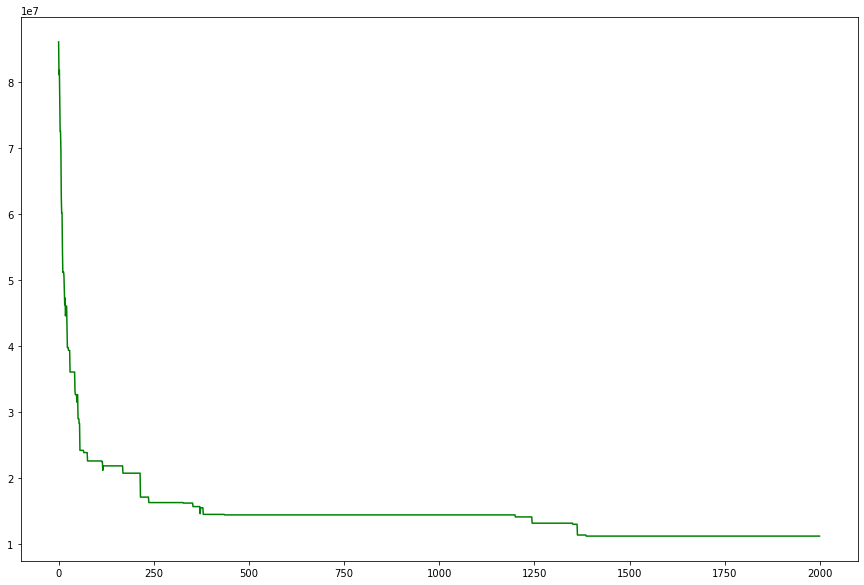

In [15]:
plt.rcParams['figure.figsize'] = [15,10];
plt.plot(range(0, gen), allbest, c="green")

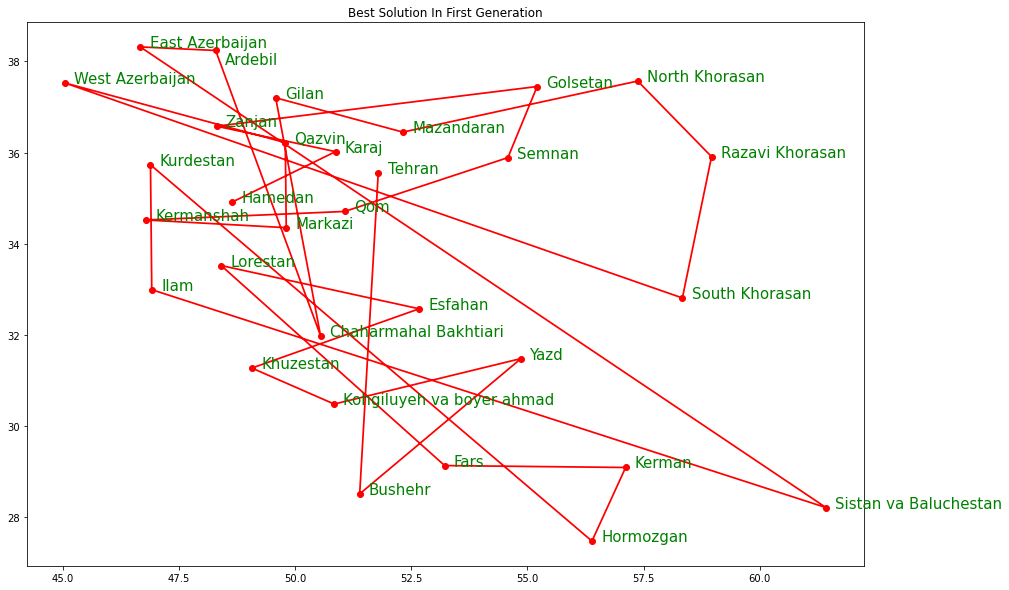

In [16]:
plt.rcParams['figure.figsize'] = [15,10];

string = [(name[i]) for i in range(len(cities))]
for i in range(len(cityCoordinates)):
    plt.plot(citylat[i,1],citylat[i,0], 'ro')
    if i == 0:
        plt.text(citylat[i,1]+0.2 , citylat[i,0]-0.3 ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    else:
        plt.text(citylat[i,1]+0.2 , citylat[i,0] ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    
xx = [citylat[i][0] for i in bestgen[1]]
yy = [citylat[i][1] for i in bestgen[1]]

plt.plot(yy, xx, color="red", linewidth=1.75, linestyle="-")
plt.title("Best Solution In First Generation")
plt.show()

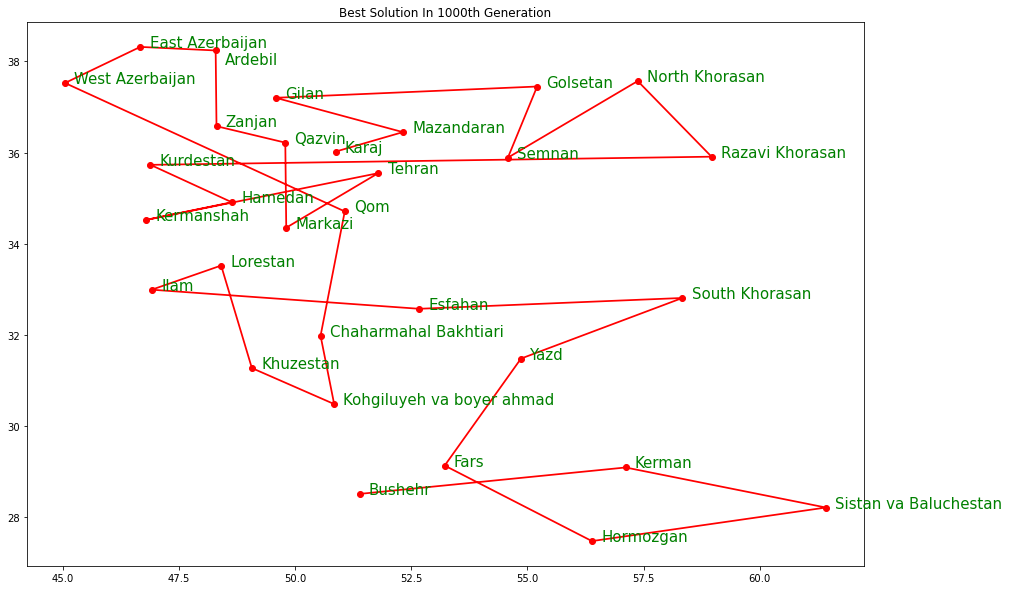

In [17]:
plt.rcParams['figure.figsize'] = [15,10];

string = [(name[i]) for i in range(len(cities))]
for i in range(len(cityCoordinates)):
    plt.plot(citylat[i,1],citylat[i,0], 'ro')
    if i == 0:
        plt.text(citylat[i,1]+0.2 , citylat[i,0]-0.3 ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    else:
        plt.text(citylat[i,1]+0.2 , citylat[i,0] ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    
xx = [citylat[i][0] for i in bestgen[int(len(bestgen) / 2)]]
yy = [citylat[i][1] for i in bestgen[int(len(bestgen) / 2)]]

plt.plot(yy, xx, color="red", linewidth=1.75, linestyle="-")
plt.title("Best Solution In 1000th Generation")
plt.show()

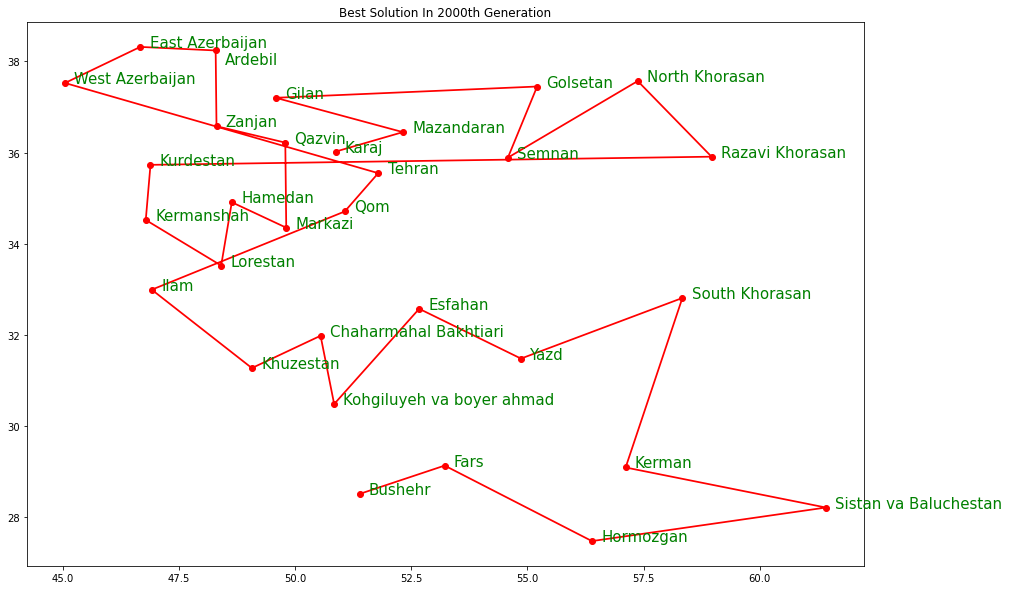

In [18]:
plt.rcParams['figure.figsize'] = [15,10];

string = [(name[i]) for i in range(len(cities))]
for i in range(len(cityCoordinates)):
    plt.plot(citylat[i,1],citylat[i,0], 'ro')
    if i == 0:
        plt.text(citylat[i,1]+0.2 , citylat[i,0]-0.3 ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    else:
        plt.text(citylat[i,1]+0.2 , citylat[i,0] ,
                string[np.where(citylat == citylat[i,0])[0][0]], color="green", fontsize=15)
    
xx = [citylat[i][0] for i in bestgen[-1]]
yy = [citylat[i][1] for i in bestgen[-1]]

plt.plot(yy, xx, color="red", linewidth=1.75, linestyle="-")
plt.title("Best Solution In 2000th Generation")
plt.show()